In [3]:
!pwd

1+3

!ls

# *hola*

print("1")

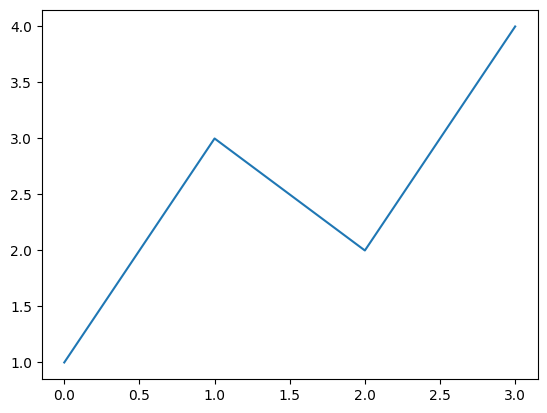

In [1]:
a = 1
b = 3
c = 2
d = 4

import matplotlib.pyplot as plt

plt.plot([a,b,c,d])
plt.show()

In [7]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")
    
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In [29]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

urls = search_images('foxes photos', max_images=1)
urls[0]

Searching for 'foxes photos'


'https://www.pwpark.com/wp-content/uploads/2018/09/Red-Fox-min.jpg'

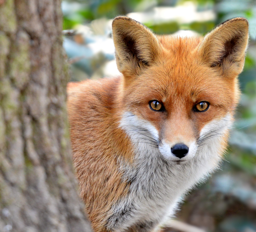

In [32]:
from fastdownload import download_url
dest = 'fox.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'coyote photos'


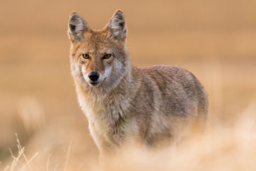

In [33]:
coyote_img_url = 'coyote.jpg'

download_url(search_images('coyote photos', max_images=1)[0], coyote_img_url, show_progress=False)
Image.open(coyote_img_url).to_thumb(256,256)

In [36]:
searches = 'fox','coyote'
path = Path('fox_or_not')
from time import sleep

for search_item in searches:
    dest = (path/search_item)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{search_item} photo'))
    download_images(dest, urls=search_images(f'{search_item} sun photo'))
    download_images(dest, urls=search_images(f'{search_item} shade photo'))
    resize_images(path/search_item, max_size=400, dest=path/search_item)

Searching for 'fox photo'
Searching for 'fox sun photo'
Searching for 'fox shade photo'
Searching for 'coyote photo'
Searching for 'coyote sun photo'
Searching for 'coyote shade photo'


In [37]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

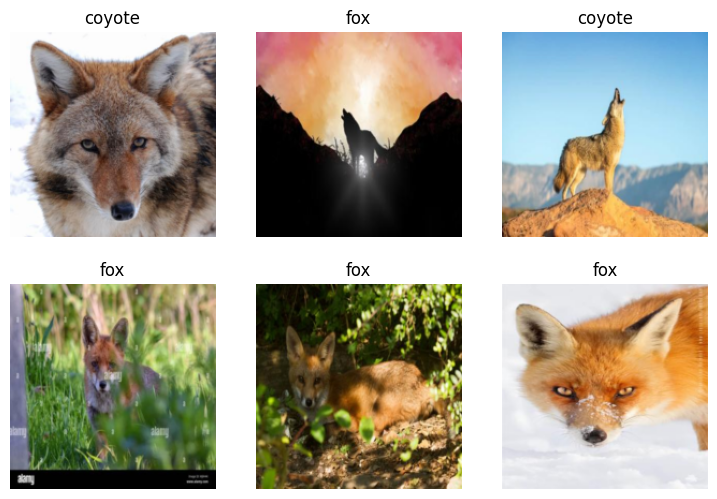

In [38]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [39]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.938114,0.166797,0.041667,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.214993,0.342248,0.166667,00:21
1,0.164268,0.233406,0.062500,00:21
2,0.114910,0.113665,0.083333,00:21


In [43]:
is_fox,_,probs = learn.predict(PILImage.create('fox.jpg'))
print(f"This is a: {is_fox}.")
print(f"Probability it's a coyote: {probs[0]:.4f}")

This is a: fox.
Probability it's a coyote: 0.0193
